## <font color = blue> Initial Data Loading </font>

In [1]:
# install stargazer
install.packages("stargazer", repos="http://cran.us.r-project.org")
library(stargazer)

# install corrplot
install.packages("corrplot", repos="http://cran.us.r-project.org")
library(corrplot)

# unpack Hmisc (package Hmisc was installed via conda)
library(Hmisc)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



In [2]:
# read in crime data
crime_raw = read.csv("crime_v2.csv", stringsAsFactors = FALSE)
crime_raw = data.frame(crime_raw)

## <font color = blue> Initial Data Exploration & Cleaning </font>

In [3]:
# data dimensions
dim(crime_raw)

# peek at crime data
head(crime_raw)

[1] 97 25

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [4]:
# summary statistics
str(crime_raw)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : chr  "0.527595997" "1.481480002" "0.267856985" "0.525424004" ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282

In [5]:
# check if panel data are from the same year
unique(crime_raw$year)

[1] 87 NA

In [6]:
# check for any duplicate rows
duplicate_df <- crime_raw[duplicated(crime_raw) == TRUE,]
duplicate_df

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
# check # of unique values in prbconv
length(unique(crime_raw$prbconv))

# transform prbconv into numerical values
crime_raw$prbconv <- as.numeric(crime_raw$prbconv)

[1] 92

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [8]:
# remove NA and duplicate rows
crime <- unique(crime_raw[-c(92:97),])

In [9]:
# confirm duplicate and NA rows are removed
dim(crime)

# check updated crime data frame
str(crime)

[1] 90 25

'data.frame':	90 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

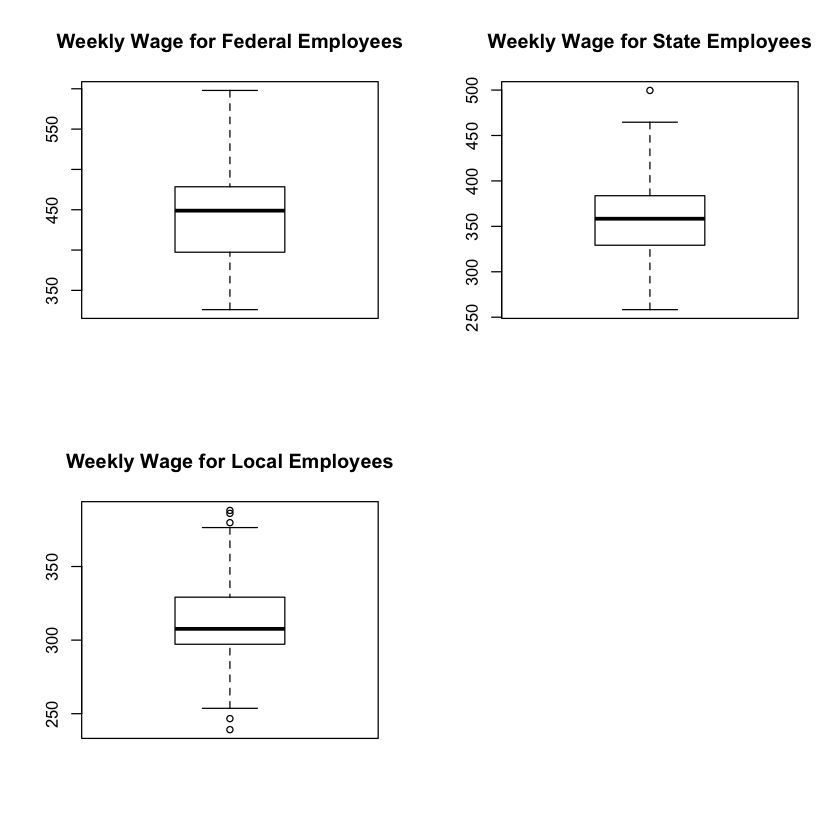

In [10]:
# box plot of fed, state, and local wage data to evaluate top
# and bottom coding
par(mfrow = c(2,2))

boxplot(crime$wfed, main = "Weekly Wage for Federal Employees")
boxplot(crime$wsta, main = "Weekly Wage for State Employees")
boxplot(crime$wloc, main = "Weekly Wage for Local Employees")

**Correlation Matrix to understand collinearity**

In [11]:
# create correlation matrix, remove county and year as they are unique identifiers
cor_matrix <- rcorr(as.matrix(crime[-c(1:2),-c(1:2)]))

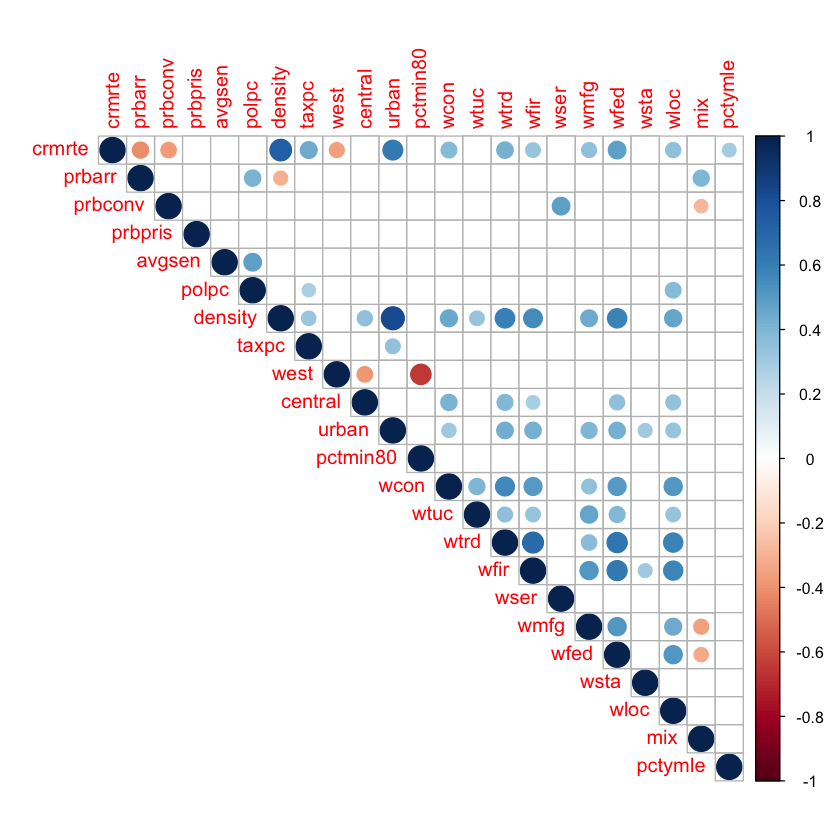

In [12]:
par(mfrow = c(1,1))
corrplot(cor_matrix$r, type = "upper", p.mat = cor_matrix$P, sig.level = 0.01, insig = "blank")

Citation:<br>
http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

In [13]:
# transform and add median of all wages to address collinearity
crime$wmed <- apply(crime[,c("wcon","wtuc","wtrd","wfir","wser","wmfg","wfed","wsta","wloc")],1,median)

In [14]:
# descriptive statistics for updated crime dataframe
stargazer(crime, title="Descriptive Statistics", type = "text", digits=2)


Descriptive Statistics
Statistic N   Mean  St. Dev.  Min   Pctl(25) Pctl(75)   Max   
--------------------------------------------------------------
county    90 100.60  58.32     1      51.5    150.5     197   
year      90 87.00    0.00     87      87       87       87   
crmrte    90  0.03    0.02    0.01    0.02     0.04     0.10  
prbarr    90  0.30    0.14    0.09    0.20     0.34     1.09  
prbconv   90  0.55    0.35    0.07    0.34     0.59     2.12  
prbpris   90  0.41    0.08    0.15    0.36     0.46     0.60  
avgsen    90  9.69    2.83    5.38    7.38    11.47    20.70  
polpc     90 0.002   0.001   0.001   0.001    0.002     0.01  
density   90  1.44    1.52   0.0000   0.55     1.57     8.83  
taxpc     90 38.16   13.11   25.69   30.73    41.01    119.76 
west      90  0.24    0.43     0       0        0        1    
central   90  0.38    0.49     0       0        1        1    
urban     90  0.09    0.29     0       0        0        1    
pctmin80  90 25.71   16.98    1

## <font color = blue> The Model Building Process </font>
### Exploratory Data Analysis of Outcome Variable

In [15]:
# look at summary statistics for crimes committed per person
summary(crime$crmrte)

sd(crime$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

[1] 0.01888699

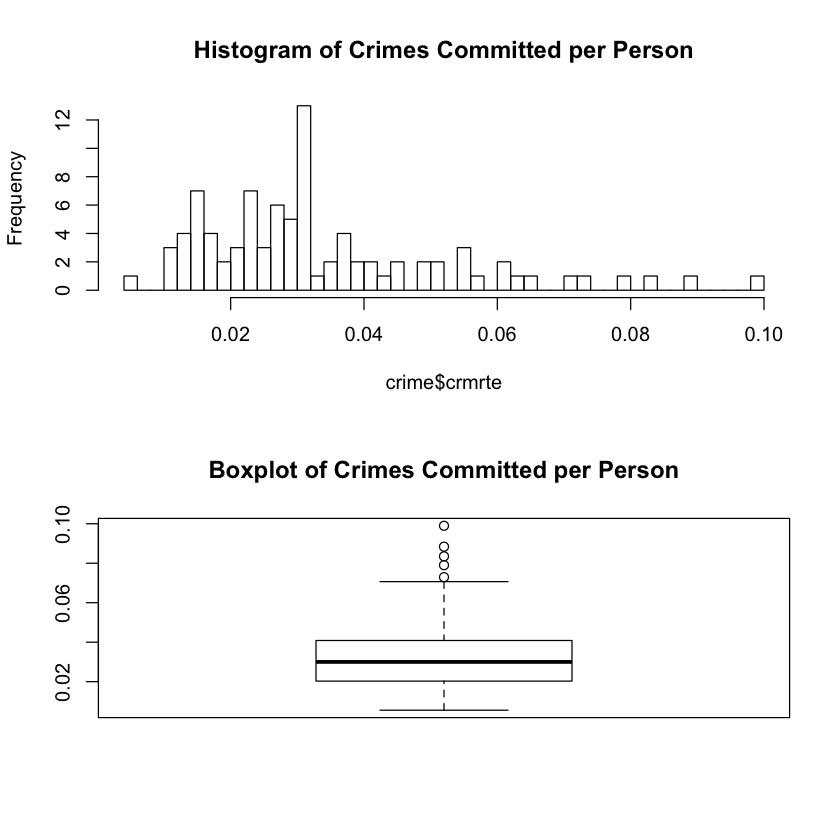

In [16]:
# understand distribution of crmrte 
par("pty", mfrow = c(2,1))

# plot histogram & boxplot
hist(crime$crmrte, main = "Histogram of Crimes Committed per Person", breaks = 50)
boxplot(crime$crmrte, main = "Boxplot of Crimes Committed per Person")

### Univariate Analysis of Outcome and Explanatory Variables Based on Our Research Question

How can we leverage tax, policing, and housing policy in our campaign to lower crime?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.69   30.73   34.92   38.16   41.01  119.76 

[1] 13.11184


	Pearson's product-moment correlation

data:  crime$taxpc and crime$crmrte
t = 4.7101, df = 88, p-value = 9.181e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2663771 0.6000469
sample estimates:
      cor 
0.4487151 


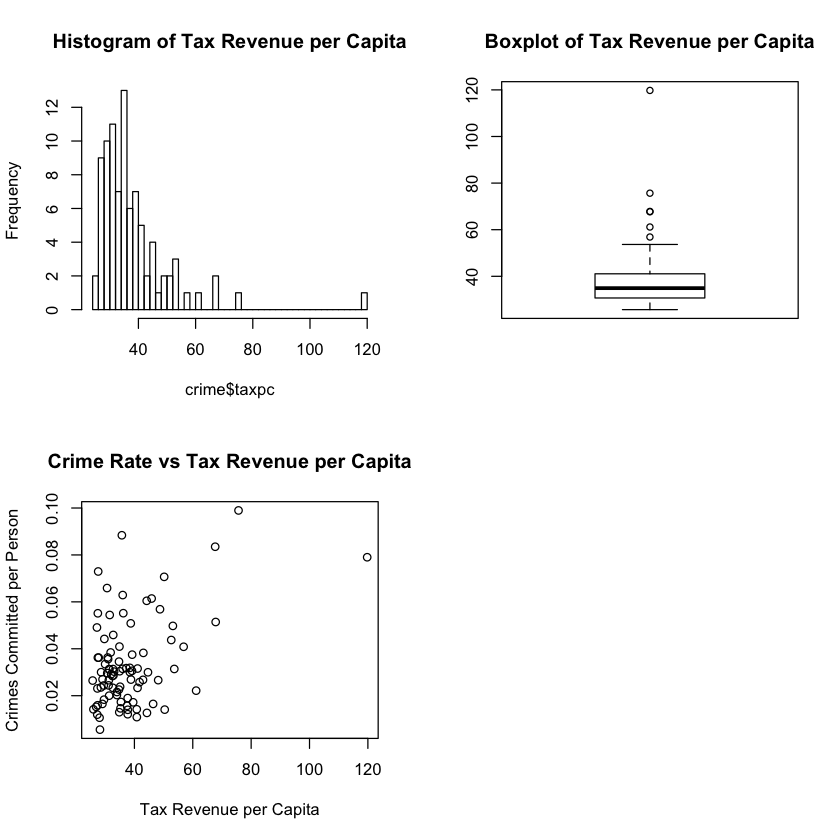

In [17]:
# evaluate taxpc
summary(crime$taxpc)
sd(crime$taxpc)

# evaluate correlation between crmrte and taxpc
cor.test(crime$taxpc, crime$crmrte)

# figures
par("pty", mfrow = c(2,2))

hist(crime$taxpc, main = "Histogram of Tax Revenue per Capita", breaks = 50)

boxplot(crime$taxpc, main = "Boxplot of Tax Revenue per Capita")

plot(crime$taxpc, crime$crmrte, 
     main = "Crime Rate vs Tax Revenue per Capita",
     xlab = "Tax Revenue per Capita",
     ylab = "Crimes Committed per Person")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  231.7   294.3   310.1   315.5   331.1   436.8 

[1] 37.77076


	Pearson's product-moment correlation

data:  crime$density and crime$crmrte
t = 9.9721, df = 88, p-value = 4.101e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6138760 0.8128519
sample estimates:
      cor 
0.7283706 


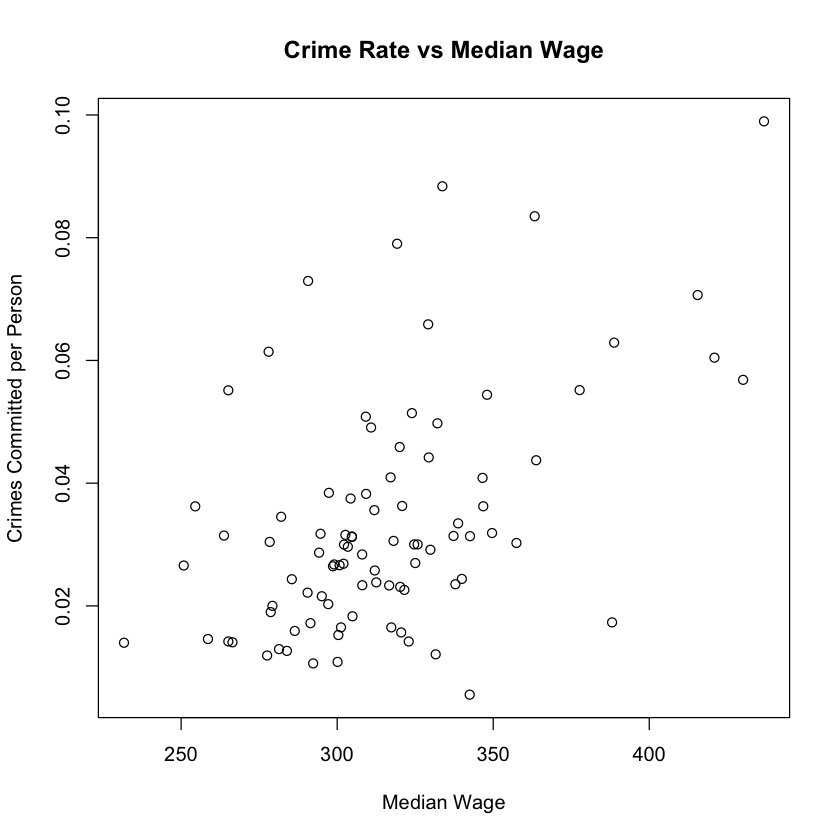

In [18]:
# evaluate wmed

summary(crime$wmed)
sd(crime$wmed)

# evaluate correlation between crmrte and wmed
cor.test(crime$density, crime$crmrte)

# figures
# par("pty", mfrow = c(2,2))

# hist(crime$density, main = "Histogram of Density per Capita", breaks = 50)

# boxplot(crime$density, main = "Boxplot of Density per Capita")

# crime and wmed
plot(crime$wmed, crime$crmrte, 
     main = "Crime Rate vs Median Wage",
     xlab = "Median Wage",
     ylab = "Crimes Committed per Person")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27146 0.29524 0.34487 1.09091 

[1] 0.137673


	Pearson's product-moment correlation

data:  crime$prbarr and crime$crmrte
t = -4.0368, df = 88, p-value = 0.0001153
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5567951 -0.2049707
sample estimates:
      cor 
-0.395283 


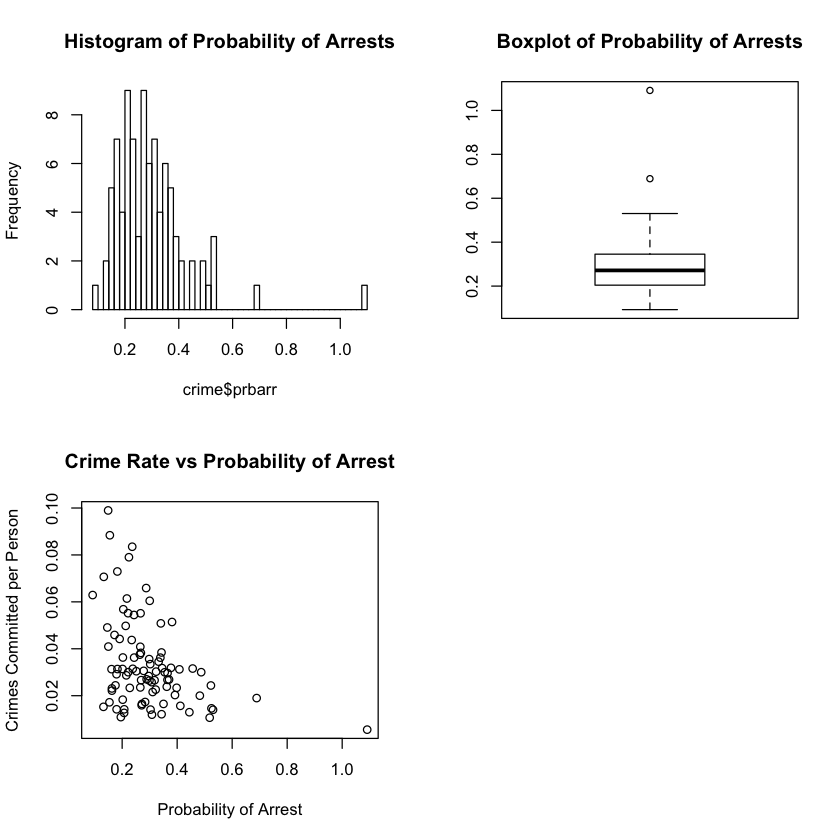

In [19]:
# evaluate prbarr
summary(crime$prbarr)
sd(crime$prbarr)

# evaluate correlation between crmrte and prbarr
cor.test(crime$prbarr, crime$crmrte)

# figures
par("pty", mfrow = c(2,2))

hist(crime$prbarr, main = "Histogram of Probability of Arrests", breaks = 50)

boxplot(crime$prbarr, main = "Boxplot of Probability of Arrests")

# crime and prbarr
plot(crime$prbarr, crime$crmrte, 
     main = "Crime Rate vs Probability of Arrest",
     xlab = "Probability of Arrest",
     ylab = "Crimes Committed per Person")

In [20]:
# log transformation to see if correlation improves
cor.test(log(crime$prbarr), crime$crmrte)


	Pearson's product-moment correlation

data:  log(crime$prbarr) and crime$crmrte
t = -4.351, df = 88, p-value = 3.638e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5775328 -0.2340713
sample estimates:
       cor 
-0.4207661 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

[1] 1.521554


	Pearson's product-moment correlation

data:  crime$density and crime$crmrte
t = 9.9721, df = 88, p-value = 4.101e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6138760 0.8128519
sample estimates:
      cor 
0.7283706 


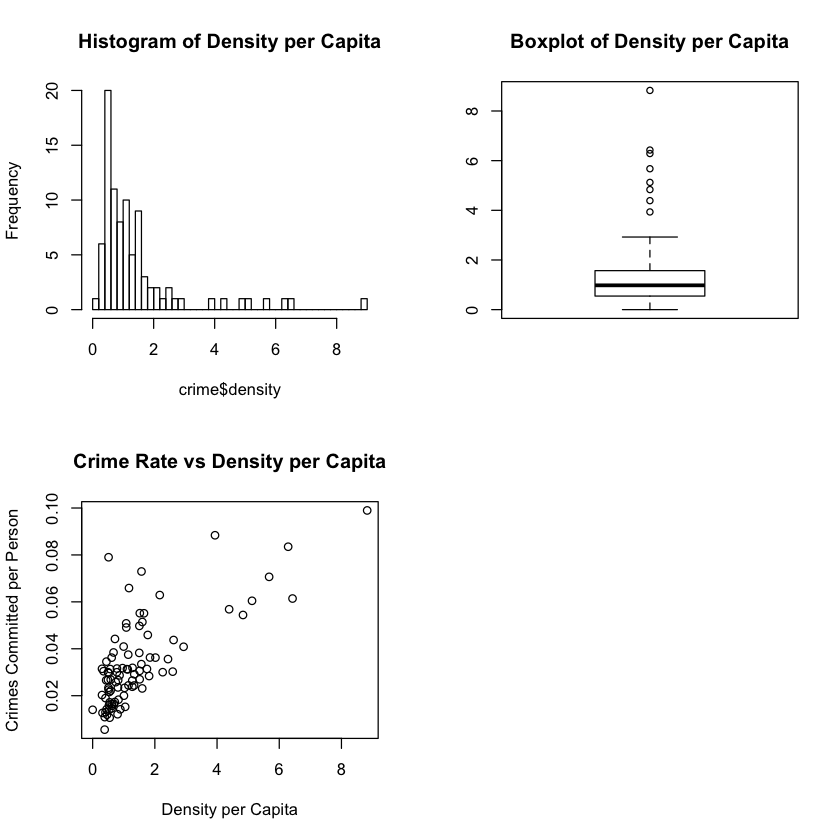

In [21]:
# evaluate density
summary(crime$density)
sd(crime$density)

# evaluate correlation between crmrte and density
cor.test(crime$density, crime$crmrte)

# figures
par("pty", mfrow = c(2,2))

hist(crime$density, main = "Histogram of Density per Capita", breaks = 50)

boxplot(crime$density, main = "Boxplot of Density per Capita")

# crime and density
plot(crime$density, crime$crmrte, 
     main = "Crime Rate vs Density per Capita",
     xlab = "Density per Capita",
     ylab = "Crimes Committed per Person")

## <font color = blue> Model 1 </font>

In [22]:
# install.packages("lmtest")
library(lmtest)
library(sandwich)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [23]:
# Create Model 1
model1 <- lm(crmrte ~ prbarr + density + taxpc,
             data = crime)

# Use robost standard error in case of heteroskedasticity
se.model1 = coeftest(model1, vcov = vcovHC)[ , "Std. Error"]

# Display Model 1 in regression table
stargazer(model1, type = "text", title = "Model 1 Results",
          ci.levels = .95, align = T, single.row = T,
          se = list(se.model1),
          star.cutoffs = c(0.05, 0.01, 0.001))

# Calculate AIC for model 1
AIC(model1)


Model 1 Results
                         Dependent variable:     
                    -----------------------------
                               crmrte            
-------------------------------------------------
prbarr                    -0.025** (0.008)       
density                   0.007*** (0.001)       
taxpc                      0.0003 (0.0003)       
Constant                    0.017 (0.010)        
-------------------------------------------------
Observations                     90              
R2                              0.612            
Adjusted R2                     0.599            
Residual Std. Error        0.012 (df = 86)       
F Statistic            45.288*** (df = 3; 86)    
Note:               *p<0.05; **p<0.01; ***p<0.001

Model 1 Results
=====
0.950
-----


[1] -535.3614

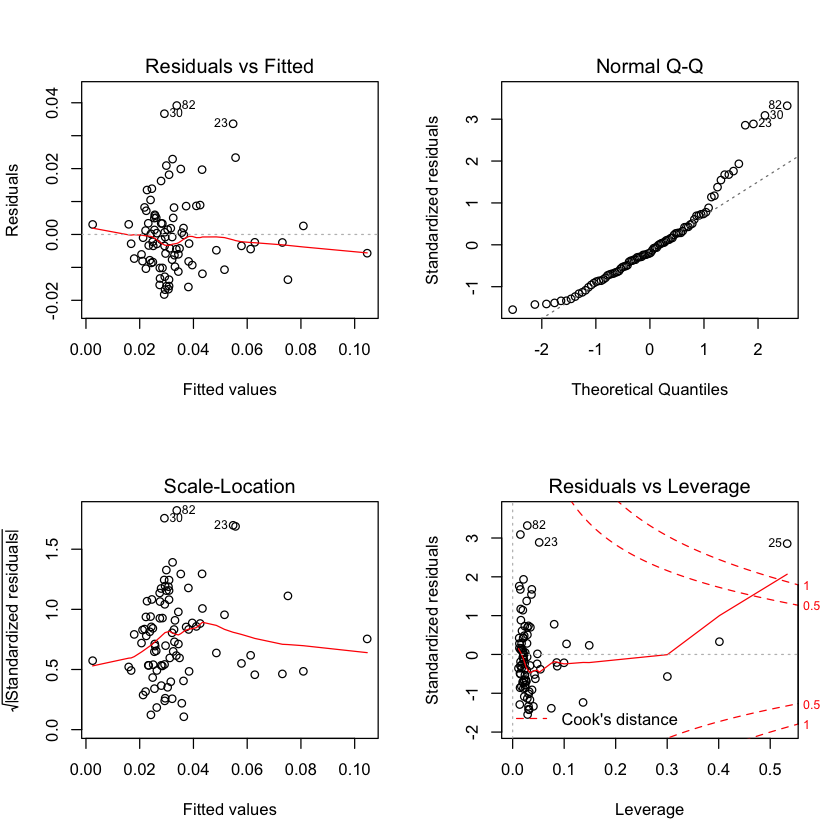

In [24]:
# regression diagnostics plots to check data assumptions
par(mfrow = c(2,2))
plot(model1)

In [25]:
# prbarr and taxpc
cor.test(crime$taxpc, crime$prbarr)

# density and taxpc
cor.test(crime$taxpc, crime$density)

# density and prbarr
cor.test(crime$prbarr, crime$density)


	Pearson's product-moment correlation

data:  crime$taxpc and crime$prbarr
t = -1.2993, df = 88, p-value = 0.1973
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.33477097  0.07194407
sample estimates:
      cor 
-0.137191 



	Pearson's product-moment correlation

data:  crime$taxpc and crime$density
t = 3.1696, df = 88, p-value = 0.0021
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1210329 0.4944170
sample estimates:
      cor 
0.3201007 



	Pearson's product-moment correlation

data:  crime$prbarr and crime$density
t = -2.9794, df = 88, p-value = 0.003733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4797216 -0.1020062
sample estimates:
       cor 
-0.3027029 
